In [1]:
import pandas as pd
def city(value, df):
    return pd.concat([df[df['city'] == str(value)],df[df['city_x'] == str(value)]]).sort_values('power', ascending=False)
def province(value, df):
    return pd.concat([df[df['province'] == str(value)][df['province_x'] == str(value)]]).sort_values('power', ascending=False).drop_duplicates()
def country(value, df):
    return pd.concat([df[df['country'] == str(value)],df[df['country_x'] == str(value)]]).sort_values('power', ascending=False)
def population(value, df):
    return pd.concat([df[df['pop_x'] > value],df[df['pop'] > value]]).sort_values('power', ascending=False)
def populationrange(value1,value2, df):
    return pd.concat([df[df['pop_x'].between(value1,value2,inclusive=True)],df[df['pop'].between(value1,value2,inclusive=True)]]).sort_values('power', ascending=False).drop_duplicates()
def provincetoprovince(value1,value2,df):
    return pd.concat([df[df['province'] == value1][df['province_x']==value2], df[df['province_x'] == value1][df['province']==value2]]).sort_values('power', ascending = False)
def citytocity(value1,value2,df):
    return pd.concat([df[df['city'] == value1][df['city_x']==value2], df[df['city_x'] == value1][df['city']==value2]]).sort_values('power', ascending = False)
def province2(value, df):
    return df[df['province']==str(value)][df['province_x']==str(value)]
def province3(value, df):
    return pd.concat([df[df['province'] == str(value)],df[df['province_x'] == str(value)]]).sort_values('power', ascending=False)
def country2(value,df):
    return df[df['country']==str(value)][df['country_x']==str(value)]
def closestlarger(df):
    return df.sort_values(['city_x','distance']).drop_duplicates('city_x').sort_values('distance', ascending = False)
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
import numpy as np
df=pd.read_csv('namericaclean.csv').sort_values('pop',ascending=False).drop_duplicates('power').drop('index',1)
df= df.sort_values('power', ascending = False).reset_index().drop('index',1)[['city','province','country','city_x','province_x','country_x','pop','pop_x','lat','lat_x','lng','lng_x','power','distance','combined_pop']]
df['power2'] = df['pop'] * df['pop_x'] / df['distance']
lrt = df[df['distance'] <= 100]
hsr = df[(df['distance'] < 1000) & (df['distance'] > 100)]
flight = df[df['distance'] >= 1000]
hsr.head()

/var/folders/qc/qdwcn8y54q9bc60c6s4xrk1c0000gn/T/ipykernel_73751/2911865290.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=pd.read_csv('namericaclean.csv').sort_values('pop',ascending=False).drop_duplicates('power').drop('index',1)
/var/folders/qc/qdwcn8y54q9bc60c6s4xrk1c0000gn/T/ipykernel_73751/2911865290.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df= df.sort_values('power', ascending = False).reset_index().drop('index',1)[['city','province','country','city_x','province_x','country_x','pop','pop_x','lat','lat_x','lng','lng_x','power','distance','combined_pop']]


city  province                   country        city_x    province_x  \
25  New York  New York  United States of America  Philadelphia  Pennsylvania   
26  New York  New York  United States of America  Poughkeepsie      New York   
27  New York  New York  United States of America     New Haven   Connecticut   
31  New York  New York  United States of America     Waterbury   Connecticut   
36  New York  New York  United States of America     Allentown  Pennsylvania   

                   country_x         pop      pop_x        lat      lat_x  \
25  United States of America  13524139.0  3504775.0  40.749979  39.999973   
26  United States of America  13524139.0   100670.5  40.749979  41.700231   
27  United States of America  13524139.0   707883.0  40.749979  41.330383   
31  United States of America  13524139.0   174236.0  40.749979  41.550008   
36  United States of America  13524139.0   300980.5  40.749979  40.599988   

          lng      lng_x          power    distance  combined_pop  \
25 -73.980017 -75.169996  130040.293709  130.951058    17028914.0   
26 -73.980017 -73.921416  128964.606474  105.647665    13624809.5   
27 -73.980017 -72.900005  127801.711877  111.360183    14232022.0   
31 -73.980017 -73.050022  115821.001942  118.271944    13698375.0   
36 -73.980017 -75.500028  106687.086387  129.585688    13825119.5   

          power2  
25  3.619601e+11  
26  1.288700e+10  
27  8.596886e+10  
31  1.992351e+10  
36  3.141166e+10

In [2]:
def dbscanner(x, y, a, b):
    from sklearn.cluster import DBSCAN
    dbscan = DBSCAN(eps = a, min_samples = b)
    dbscan.fit(X)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
    import numpy as np
    core_samples = np.zeros_like(labels, dtype = bool)  
    core_samples[dbscan.core_sample_indices_] = True 
    print(core_samples)
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)

    for (label, color) in zip(unique_labels, colors):
        class_member_mask = (labels == label)
        n = X.loc[class_member_mask & core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)

        n = X.loc[class_member_mask & ~core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)

    plt.show()

In [3]:
hsr.shape

(79196, 16)

In [4]:
flight = flight.sort_values('power2', ascending=False).reset_index().drop('index',1)
hsr = hsr.sort_values('power2', ascending=False).reset_index().drop('index',1)

/var/folders/qc/qdwcn8y54q9bc60c6s4xrk1c0000gn/T/ipykernel_73751/3375627644.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  flight = flight.sort_values('power2', ascending=False).reset_index().drop('index',1)
/var/folders/qc/qdwcn8y54q9bc60c6s4xrk1c0000gn/T/ipykernel_73751/3375627644.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hsr = hsr.sort_values('power2', ascending=False).reset_index().drop('index',1)


In [5]:
hsr

city    province                   country            city_x  \
0           New York    New York  United States of America      Philadelphia   
1           New York    New York  United States of America            Boston   
2           New York    New York  United States of America           Toronto   
3           New York    New York  United States of America  Washington, D.C.   
4        Los Angeles  California  United States of America         San Diego   
...              ...         ...                       ...               ...   
79191  Coral Harbour     Nunavut                    Canada           Ennadai   
79192   Nelson House    Manitoba                    Canada           Ennadai   
79193      Churchill    Manitoba                    Canada           Ennadai   
79194      Lynn Lake    Manitoba                    Canada           Ennadai   
79195    Island Lake    Manitoba                    Canada           Ennadai   

                 province_x                 country_x         pop      pop_x  \
0              Pennsylvania  United States of America  13524139.0  3504775.0   
1             Massachusetts  United States of America  13524139.0  2528070.5   
2                   Ontario                    Canada  13524139.0  4573710.5   
3      District of Columbia  United States of America  13524139.0  2445216.5   
4                California  United States of America   8097410.0  1938570.5   
...                     ...                       ...         ...        ...   
79191               Nunavut                    Canada       834.0        0.0   
79192               Nunavut                    Canada      2500.0        0.0   
79193               Nunavut                    Canada       961.5        0.0   
79194               Nunavut                    Canada       482.0        0.0   
79195               Nunavut                    Canada        10.0        0.0   

             lat      lat_x         lng       lng_x          power  \
0      40.749979  39.999973  -73.980017  -75.169996  130040.293709   
1      40.749979  42.329960  -73.980017  -71.070014   53585.185324   
2      40.749979  43.699980  -73.980017  -79.420021   32564.801876   
3      40.749979  38.899549  -73.980017  -77.009419   48269.993460   
4      33.989978  32.820024 -118.179980 -117.179990   62859.324065   
...          ...        ...         ...         ...            ...   
79191  64.153770  61.133283  -83.176587 -100.883336       0.864532   
79192  55.800456  61.133283  -98.850023 -100.883336       4.127724   
79193  58.765985  61.133283  -94.165994 -100.883336       2.097351   
79194  56.850030  61.133283 -101.049967 -100.883336       1.010000   
79195  53.966588  61.133283  -94.766578 -100.883336       0.011399   

         distance  combined_pop        power2  
0      130.951058    17028914.0  3.619601e+11  
1      299.564318    16052209.5  1.141323e+11  
2      555.748798    18097849.5  1.113012e+11  
3      330.834010    15969355.5  9.995782e+10  
4      159.657786    10035980.5  9.831904e+10  
...           ...           ...           ...  
79191  964.683622         834.0  0.000000e+00  
79192  605.660603        2500.0  0.000000e+00  
79193  458.435437         961.5  0.000000e+00  
79194  477.227564         482.0  0.000000e+00  
79195  877.266903          10.0  0.000000e+00  

[79196 rows x 16 columns]


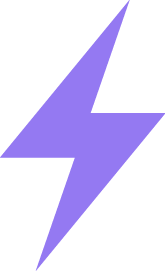

Running local mode, some functionality limited.



In [6]:
##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)
def lightning(df, n):
    X = df[['lng_x','lat_x','city_x']].head(n).drop_duplicates()
    x = X['lng_x']
    y = X['lat_x']
    return lgn.scatter(x, y, labels = X['city_x'])

In [7]:
X = hsr[['lng_x','lat_x','city_x']].head(600).drop_duplicates()
x = X['lng_x']
y = X['lat_x']
lgn.scatter(x, y, labels = X['city_x'])

In [8]:
lightning(flight, 100)

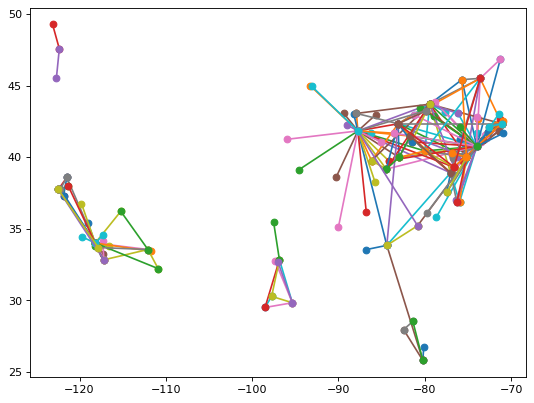

In [18]:
top_200 = set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
X = hsr[['lng_x','lat_x','lng','lat','city_x','city','province_x','province']].head(600).drop_duplicates()
for n in range(0,200):
    top_200.add(f"{X.iloc[n]['city_x']}, {X.iloc[n]['province_x']}")
    top_200.add(f"{X.iloc[n]['city']}, {X.iloc[n]['province']}")
    plt.plot([X.iloc[n]['lng'],X.iloc[n]['lng_x']],[X.iloc[n]['lat'],X.iloc[n]['lat_x']], marker = 'o')
plt.show()

In [19]:
top_200

{'Akron, Ohio',
 'Albany, New York',
 'Allentown, Pennsylvania',
 'Arlington, Texas',
 'Atlanta, Georgia',
 'Austin, Texas',
 'Bakersfield, California',
 'Baltimore, Maryland',
 'Binghamton, New York',
 'Birmingham, Alabama',
 'Boston, Massachusetts',
 'Bridgeport, Connecticut',
 'Buffalo, New York',
 'Charlotte, North Carolina',
 'Chicago, Illinois',
 'Cincinnati, Ohio',
 'Cleveland, Ohio',
 'Columbus, Ohio',
 'Dallas, Texas',
 'Dayton, Ohio',
 'Detroit, Michigan',
 'Fort Wayne, Indiana',
 'Fresno, California',
 'Ft. Worth, Texas',
 'Grand Rapids, Michigan',
 'Greensboro, North Carolina',
 'Hamilton, Ontario',
 'Hampton, Virginia',
 'Harrisburg, Pennsylvania',
 'Hartford, Connecticut',
 'Houston, Texas',
 'Indianapolis, Indiana',
 'Irvine, California',
 'Kansas City, Missouri',
 'Kitchener, Ontario',
 'Lancaster, Pennsylvania',
 'Las Vegas, Nevada',
 'London, Ontario',
 'Long Beach, California',
 'Los Angeles, California',
 'Louisville, Kentucky',
 'Lowell, Massachusetts',
 'Madison, 

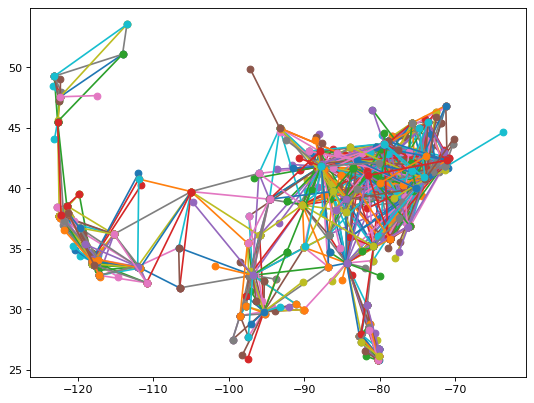

(1000, 9)


In [29]:
top_1000 = set()
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
n = 1000
X = hsr[['lng_x','lat_x','lng','lat','city_x','city','province','province_x','power']].head(n).drop_duplicates()
for n in range(0,n):
    top_1000.add(f"{X.iloc[n]['city_x']}, {X.iloc[n]['province_x']}")
    top_1000.add(f"{X.iloc[n]['city']}, {X.iloc[n]['province']}")
    plt.plot([X.iloc[n]['lng'],X.iloc[n]['lng_x']],[X.iloc[n]['lat'],X.iloc[n]['lat_x']], marker = 'o')
plt.show()
print(X.shape)

In [25]:
top_1000

{'Abbotsford, British Columbia',
 'Akron, Ohio',
 'Albany, New York',
 'Albuquerque, New Mexico',
 'Alexandria, Virginia',
 'Allentown, Pennsylvania',
 'Altoona, Pennsylvania',
 'Ann Arbor, Michigan',
 'Annapolis, Maryland',
 'Appleton, Wisconsin',
 'Arlington, Texas',
 'Asheville, North Carolina',
 'Atlanta, Georgia',
 'Atlantic City, New Jersey',
 'Augusta, Georgia',
 'Aurora, Illinois',
 'Austin, Texas',
 'Bakersfield, California',
 'Baltimore, Maryland',
 'Barlett, Tennessee',
 'Barrie, Ontario',
 'Baton Rouge, Louisiana',
 'Battle Creek, Michigan',
 'Beaumont, Texas',
 'Beaver Falls, Pennsylvania',
 'Belleville, Illinois',
 'Benton Harbor, Michigan',
 'Berkeley, California',
 'Binghamton, New York',
 'Birmingham, Alabama',
 'Bloomington, Illinois',
 'Bloomington, Indiana',
 'Boston, Massachusetts',
 'Bridgeport, Connecticut',
 'Brownsville, Texas',
 'Bryan, Texas',
 'Buffalo, New York',
 'Burlington, Vermont',
 'Calgary, Alberta',
 'Canton, Ohio',
 'Cape Coral, Florida',
 'Cedar R

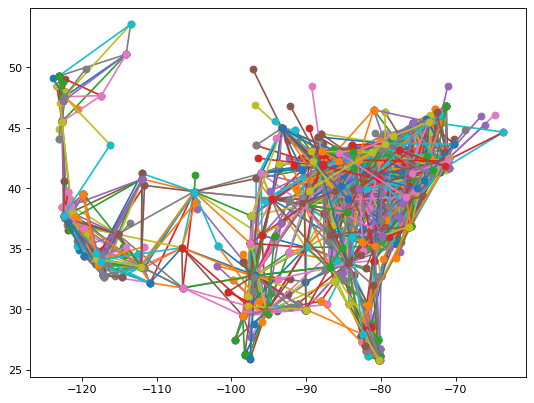

(2000, 9)


In [31]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
n = 2000
X = hsr[['lng_x','lat_x','lng','lat','city_x','city','province','province_x','power']].head(n).drop_duplicates()
for n in range(0,n):
    plt.plot([X.iloc[n]['lng'],X.iloc[n]['lng_x']],[X.iloc[n]['lat'],X.iloc[n]['lat_x']], marker = 'o')
plt.show()
print(X.shape)

In [42]:
lightning(X,2000)

In [45]:
city('Chicago',X)['province_x'].value_counts()

Wisconsin               13
Indiana                 13
Michigan                12
Ohio                    11
Ontario                 11
Illinois                11
Iowa                     9
Tennessee                8
Missouri                 7
Minnesota                6
Pennsylvania             6
Kentucky                 5
New York                 4
North Carolina           4
Kansas                   4
Alabama                  3
Nebraska                 2
West Virginia            2
Virginia                 2
Arkansas                 2
Georgia                  1
District of Columbia     1
South Dakota             1
Maryland                 1
Oklahoma                 1
South Carolina           1
North Dakota             1
Name: province_x, dtype: int64